# From Static Estimates to Bayesian Insights: A Repository Factor Model for Liquidity Prediction

_By Teddy Tenetcha_


## Background

The individual repository factor can be associated with a factor X, similar to a statistical, a measure of subjective belief about an event. In practice, there is Bayesian statistics, an approach that begins with a prior probability distribution representing one’s beliefs about the parameters of a model before seeing any data. As data are observed, Bayes’ theorem is applied to combine this prior with the likelihood of the observed data under various parameter values, resulting in a posterior probability distribution.

However, one limitation of applying Bayes’ theorem in this context is that it requires well defined prior beliefs and stable models to be truly effective. In a fluid environment like finance where markets shift unexpectedly, new information arrives continuously, and certain influences remain unknown establishing a reliable prior can be extremely challenging. If the initial assumptions (priors) are off-base, or if the model doesn’t capture the complexity of the real world scenario, the updated probabilities (posterior) may fail to reflect the true state of events. Essentially, while Bayes’ theorem offers a principled way to incorporate subjective beliefs into probabilistic reasoning, its power is limited if the starting points or the structural models don’t adequately represent the intricate and everchanging landscape in which decisions must be made.  Conceptually, using your repository factor, essentially an intuition informed prior alongside a randomness factor can be framed within a Bayesian framework. The key challenge is to quantify both your intuition and the magnitude of random influences in a meaningful way. Doing so will give you a coherent decision-making framework that balances the steady hand of experience with the ever-present uncertainty of the real world.



### 

#### Here’s how it come together:

Your accumulated intuition and experience serve as a prior belief about the likelihood of certain outcomes. This prior can be represented as a probability distribution reflecting your confidence, built from professional experience and historical patterns. The richer your repository of intuition, the more refined and informed this prior becomes.

Real world finance is filled with unanticipated shocks economic news, macro events, technological shifts. Introducing a factor that captures the randomness or volatility of these events can be done by modeling a noise component or using a broad, uncertain prior for certain parameters. This factor acknowledges that no matter how well honed your intuition, the environment includes unpredictable wildcards beyond your control.

Once these two components: a carefully chosen intuition based prior and a structured way of incorporating randomness, are in place, you can apply Bayes’ theorem as new data or signals emerge. With each update, your posterior probabilities reflect not only what you’ve learned from recent information, but also how well your initial intuition holds up under the stress of random shocks.

To model the randomness of the world, I conceptualize the noise factor as a probability distribution that embodies the world’s inherent complexity and the limitations of your knowledge.

##  

#### Here's how it's structure:

Uncertainty as a Broad Prior:
Acknowledge that you cannot have comprehensive information at all times. Begin with a probability distribution that has a wide variance a broad prior. This prior isn’t tied to a particular event, it represents your incomplete state of knowledge. It’s deliberately loose, reflecting the fact that countless unknown variables could influence outcomes.

#### Separate the Known from the Unknown:

Divide factors into two categories:

_Known Variables_ : Parameters for which you have direct, reliable information (interest rates, corporate earnings, regulatory changes).

_Unknown Variables (Noise)_ : Factors you suspect exist but cannot measure directly (unforeseen technological disruptions, macro factors, shifts in market sentiment not yet on your radar).
Assign a broad, heavy-tailed probability distribution to the unknown category. Heavy tails mean that extreme events, though rare, are not given negligible probability.

#### Update in Response to Signals, Not Just Data:

Traditional Bayesian updates occur when new data are observed. In an infinitely complex world, treat even subtle signals market whispers, emerging technologies, unexpected regulatory hints as reasons to adjust your priors. This noise factor ensures that, even after updating, an error margin remains, acknowledging that some aspects of the world remain opaque and might produce surprising outcomes.

#### Incorporate Risk Tolerance and Decision Thresholds:

Because noise prevents you from being 100% certain, explicitly define your tolerance for risk and uncertainty. For example, you might set a threshold for action: if the posterior probability (accounting for both intuition and noise) surpasses a certain confidence level, you proceed. Otherwise, you wait or seek more information.

The noise factor isn’t a flaw in your reasoning, it’s a realistic recognition of complexity. By making the unknown explicit, you show that your model accounts for a world that extends beyond your current vision. It’s not about finding a single optimal point, it’s about navigating an evolving landscape with built in humility and adaptability.

## Abstract

In corporate finance, determining an optimal level of liquidity is essential but challenging, often relying on benchmarking against peer companies and drawing from market patterns. Previously, I developed a liquidity Regressor Forecasting Model trained on a broad set of public companies, allowing to estimate a client’s ideal liquidity based on learned collective wisdom (data). Building on that initial case study, I refine the approach using a Bayesian framework enriched with domain intuition. This adjustment moves beyond a single point estimate, integrating prior beliefs and uncertainty modeling into the prediction process. By incorporating expert derived priors and probabilistic reasoning, the revised model can more flexibly adapt to new information and recognize the inherent noise and complexity of real world financial environments. The result is a more nuanced, credible, and robust estimate of liquidity that provides corporate decision makers with a richer understanding of risks and potential outcomes.

## Context and Case Study Setup

In corporate finance advisory, treasurers and CFOs depend on informed guidance regarding optimal liquidity levels those that strike a balance between financial flexibility and efficiency. To support these decisions, I began with a case study leveraging a dataset of public firms, each described by financial metrics such as market capitalization, debt, capital expenditures, and free cash flow. Accompanying these features were actual liquidity values, reflecting the real world equilibrium that public companies maintain to avoid insolvency and weather unexpected conditions.


## Model Development and Training

From the dataset (liquidity_data), I initially trained a regression model to learn the collective wisdom of the market. I employed common machine learning regressors, such as Random Forest and Gradient Boosting Regressors, to determine which algorithm best captured the relationship between company characteristics and resulting liquidity levels. Through iterative testing and validation using standard train/test splits and evaluation metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE) I found that gradient boosting techniques offered a robust fit. These tools are known for their ability to handle non linearities and interactions among features, successfully approximated the healthy liquidity benchmarks observed across various industries and market caps.

## Adjusting the Model with a New Bayesian-Inspired Approach

While the gradient boosting model provided a crisp point estimate of a client’s ideal liquidity, it did not express uncertainty or incorporate domain expertise directly. To address these gaps, I introduced a Bayesian inference layer. By applying Bayesian regression methods (using PyMC), I integrated prior distributions influenced by expert intuition what I refer to as the “repository factor”. This approach produced posterior distributions of liquidity estimates rather than single point predictions.

In doing so, I combined the strengths of machine learning techniques (effective pattern recognition and predictive power) with the Bayesian framework’s ability to:

Integrate analyst intuition into the model as domain informed priors.
Quantify uncertainty, delivering not just an estimate but a range of credible values.
Better accommodate outliers and extreme events via heavier-tailed distributions.


### 2. Data Exploration

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = '/Users/teddytenetcha/Desktop/ML 03. Module Files/liquidity_data.csv'
liquidity_data = pd.read_csv(file_path)
liquidity_data.head(3)


,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,28694.04271,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0
1,24784.00051,7,209150.6401,57909.0,-2021.0,15161.00019,12105.0,37727.0
2,24142.00013,6,180108.3453,32970.0,-1817.0,15818.99981,12604.0,192592.0


In [5]:
liquidity_data.describe()

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
count,802.000000,802.000000,802.000000,802.000000,802.00000,802.000000,802.000000,802.000000
mean,3884.952199,3.017456,41645.089870,9040.720589,-1200.91799,3455.752891,1772.335973,20420.383638
std,4267.893247,1.851461,74046.522440,12112.161513,2066.29159,5679.466199,4207.345101,39483.422972
min,267.000000,0.000000,4282.810112,0.000000,-15858.00000,-6530.000000,-4888.000000,503.586000
25%,1288.328992,2.000000,10082.091010,2125.297000,-1241.00000,936.200000,232.923000,3791.525000
50%,2395.700000,3.000000,19349.403650,4562.000000,-512.00000,1695.700032,682.110000,8587.166000
75%,4512.458596,4.000000,41154.826240,10478.000000,-190.00000,3706.000000,1788.000000,18816.000000
max,28694.042710,10.000000,777070.706700,87032.000000,-5.04900,69715.000320,53244.000000,487511.000000


### 3. Splitting Data

**Lesson Workspace**

In [13]:
# Import train_test_split() from Scikit Learn's model_selection module
from sklearn.model_selection import train_test_split


In [15]:
# Define a Series named "target" containing only the target variable
target = liquidity_data.available_liquidity

# Define a DataFrame named "inputs" containing only the input features
inputs = liquidity_data.drop('available_liquidity', axis=1)

In [17]:
# Display the first row of target
target.head(1)


0    28694.04271
Name: available_liquidity, dtype: float64

In [19]:
# Display the first row of inputs
inputs.head(1)

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0


**Lesson Workspace**

In [21]:
# Split your data and pass the results to a new object named "results"
results = train_test_split(inputs, target, test_size=0.2, random_state=1)


In [23]:
# Print the type() and len() of results
print(type(results))
print(len(results))
print('---')

# For each item in results, print the item's dimensions
for item in results :
    print(item.shape)


<class 'list'>
4
---
(641, 7)
(161, 7)
(641,)
(161,)


In [25]:
input_train, input_test, target_train, target_test = results
print(input_train.shape)
print(input_test.shape)
print(target_train.shape)
print(target_test.shape)

(641, 7)
(161, 7)
(641,)
(161,)


**Lesson Workspace**

In [27]:
input_train.head(1)

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
309,3,16764.94643,1887.019,-483.002,1905.83296,859.71,8653.205


In [29]:
input_test.head(1)

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
8,8,172479.4798,24842.0,-1674.0,10841.00006,6830.0,39929.0


In [31]:
target_train.head(1)

309    1227.539
Name: available_liquidity, dtype: float64

In [33]:
target_test.head(1)

8    17708.00026
Name: available_liquidity, dtype: float64

### 4. Model Pipelines

**Lesson Workspace**

In [35]:
# Import required functions from Scikit-Learn

from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create pipelines dictionary with model pipelines for Lasso and Ridge
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state = 1)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state = 1)),
}


In [37]:
# Add pipeline for Elastic Net
from sklearn.linear_model import ElasticNet

pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state = 1))


In [39]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state = 1))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state = 1))

**Lesson Workspace**

In [41]:
# Run this cell to verify that all 5 pipelines are properly defined
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


### 5. Hyperparameter Tuning

**Lesson Workspace**

In [43]:
# Create a hyperparameter grid for Lasso
lasso_hyperparameters = {
    'lasso__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

In [45]:
# Create a hyperparameter grid for Ridge

ridge_hyperparameters = {
    'ridge__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

# Create a hyperparameter grid for Elastic Net
enet_hyperparameters = {
    'elasticnet__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [47]:
# Create a hyperparameter grid for Random Forest
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 0.3, 0.6]
}

# Create a hyperparameter grid for Gradient Booster
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]
}


**Lesson Workspace**

In [49]:
# Create the hyperparameter_grids dictionary
hyperparameter_grids = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}


In [51]:
# Run the code below to make sure everything is set up correctly
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print( key, 'was found, and it is a grid.' )
        else:
            print( key, 'was found, but it is not a grid.' )
    else:
        print( key, 'was not found')

enet was found, and it is a grid.
gb was found, and it is a grid.
ridge was found, and it is a grid.
rf was found, and it is a grid.
lasso was found, and it is a grid.


### 6. Cross Validation

**Lesson Workspace**

In [53]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

untrained_lasso_model = GridSearchCV(pipelines['lasso'], hyperparameter_grids['lasso'], cv=5)


In [55]:
models = {}

for key in pipelines.keys() :
    models[key] = GridSearchCV(pipelines[key], hyperparameter_grids[key], cv=5)
    
models.keys()

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

In [57]:
for key in models.keys() :
    models[key].fit(input_train, target_train)
    print(key, ' is trained and tuned.')

lasso  is trained and tuned.
ridge  is trained and tuned.
enet  is trained and tuned.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator

rf  is trained and tuned.
gb  is trained and tuned.


### 7. Selecting a Winning Model

**Lesson Workspace**

In [61]:
# Import the r-squared and mean absolute error metrics
from sklearn.metrics import r2_score, mean_absolute_error


In [59]:
for key in models.keys():
    preds = models[key].predict(input_test)
    print(key)
    print('R-Squared: ', round(r2_score(target_test, preds), 3))
    print('MAE: ', round(mean_absolute_error(target_test, preds), 3))
    print('---')

lasso
R-Squared:  0.498
MAE:  1710.083
---
ridge
R-Squared:  0.5
MAE:  1708.062
---
enet
R-Squared:  0.501
MAE:  1706.04
---
rf
R-Squared:  0.846
MAE:  948.754
---
gb
R-Squared:  0.854
MAE:  589.203
---


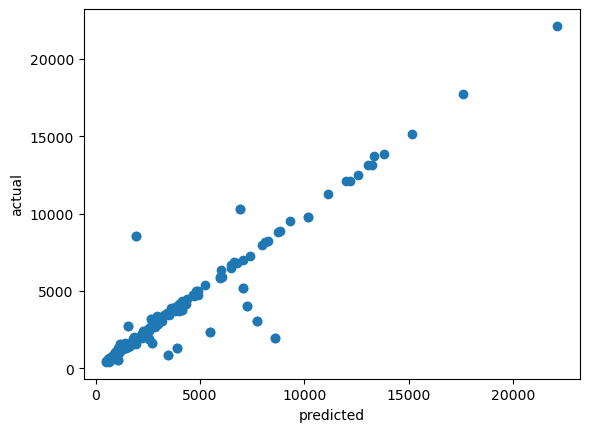

In [60]:
# Make prediction with test data
preds = models['gb'].predict(input_test)

# Plot predictions on x axis and actuals on y axis
plt.scatter(preds, target_test)

# Label axes and show graph
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


In [70]:
import pandas as pd

# Now load the client data
file_path1 = '/Users/teddytenetcha/Desktop/ML 03. Module Files/liquidity_client.csv'
liquidity_client = pd.read_csv(file_path1)

print("Columns in liquidity_client:")
print(liquidity_client.columns)

# Ensure the client data has the same features as used in training
X_client = liquidity_client[feature_cols].values

# Perform posterior predictive sampling for the client
with model:
    client_pred = pm.sample_posterior_predictive(trace, var_names=['intercept', 'coeffs', 'sigma', 'nu', 'y_obs'])

# Compute the predicted distribution for the client
client_mu = client_pred['intercept'][:, None] + np.dot(client_pred['coeffs'], X_client.T)

# Draw samples from the StudentT distribution to get predicted liquidity values
client_y_samples = pm.StudentT.dist(
    nu=client_pred['nu'][:, None],
    mu=client_mu,
    sigma=client_pred['sigma'][:, None]
).random()

print("Shape of client_y_samples:", client_y_samples.shape)
print("Example of predicted liquidity values for the client:\n", client_y_samples[:5])

client = pd.read_csv('/Users/teddytenetcha/Desktop/ML 03. Module Files/liquidity_client.csv')
models['gb'].predict(client)

array([28662.93733727])

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, coeffs, nu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'coeffs'}>,
        <Axes: title={'center': 'coeffs'}>],
       [<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

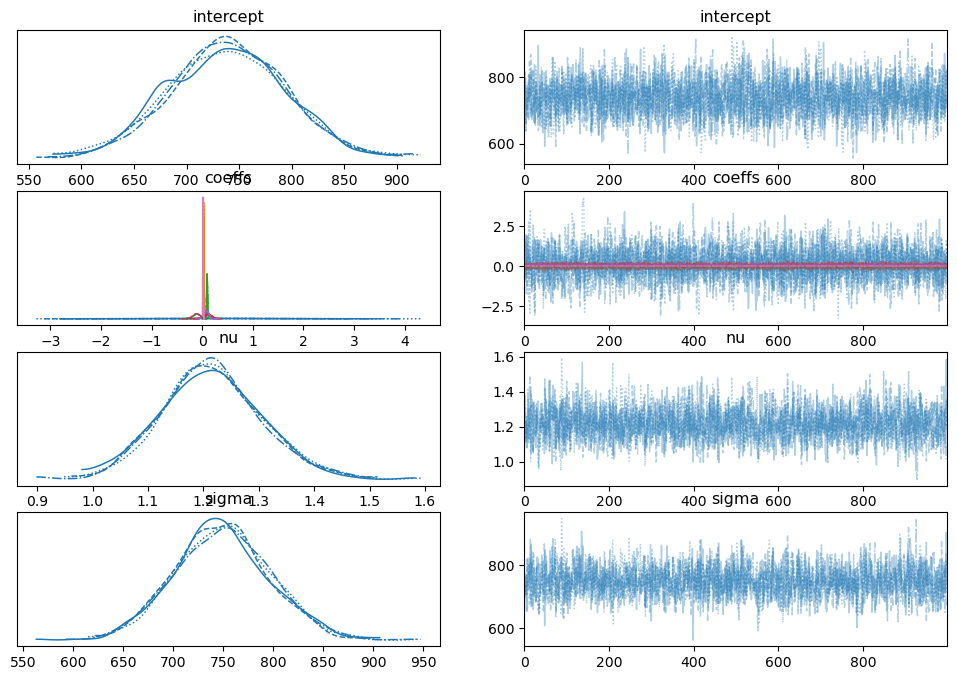

In [135]:
import pymc as pm
import numpy as np

# Identify feature columns and the proxy target.
#  Assume 'available_liquidity' is the column you want to model as the "optimal" target
feature_cols = ['sp_score', 'market_cap', 'total_debt', 'ltm_capex', 'ltm_ebitda', 'ltm_fcf', 'ltm_revenue']
X_train = liquidity_data[feature_cols].values
y_train = liquidity_data['available_liquidity'].values

with pm.Model() as model:
    # Priors for regression coefficients
    # Here we integrate intuition by setting priors.
    # For example, if from experience, you believe a median liquidity around 20,000 to 30,000 is common:
    intercept = pm.Normal('intercept', mu=25000, sigma=5000)
    coeffs = pm.Normal('coeffs', mu=0.0, sigma=1.0, shape=X_train.shape[1])

    # Noise model (Student's t) to handle heavy tails and unknown complexities.
    nu = pm.Exponential('nu', 1/30)  # degrees of freedom
    sigma = pm.HalfCauchy('sigma', beta=10000)  # scale for the residual
    
    mu = intercept + pm.math.dot(X_train, coeffs)
    y_obs = pm.StudentT('y_obs', nu=nu, mu=mu, sigma=sigma, observed=y_train)

    # Sample from the posterior
    trace = pm.sample()
    
pm.plot_trace(trace)

# Now we have a posterior distribution for model parameters.


## Explaining the Displayed Trace Plots

The trace plots shown are a standard diagnostic and interpretative tool in Bayesian inference. Each parameter in the model intercept, coeffs (for each feature), nu, and sigma is represented with two key visual components:

1. Posterior Density (Left Plots):
These plots show the estimated posterior distribution for each parameter after the model has seen the data. Like a smoothed histograms describing the probability of the parameter taking on different values. The shape and location of these distributions reflect what the model believes about each parameter after updating from prior beliefs to posterior (data informed) beliefs.

2. Trace (Right Plots):
The trace is a series of sampled values for each parameter across the Markov Chain Monte Carlo (MCMC) iterations. Ideally, the trace should look like a random cloud of points hovering around a stable mean without longterm trends. This indicates that the sampler has converged and is exploring a stable region of the parameter space. If the trace plot looks like a stable horizontal band, the sampling is likely well behaved and the results are reliable.

### In short:

A smooth, unimodal posterior density suggests the model has found a coherent estimate for that parameter.
A stable, trendless trace suggests that the MCMC has converged, giving you confidence in the posterior estimates.

## Interpreting the Findings

Intercept:
The posterior distribution for the intercept is centered around a relatively large number (hundreds or even higher, based on the scale of the data). This value serves as a baseline liquidity estimate when all other features are at their baseline (e.g., zero or mean-centered). A high intercept indicates that, on average and in the absence of other influences, the model believes companies available liquidity is quite substantial.

The stable trace and smooth, peaked posterior density for the intercept suggest the model is confident about this baseline estimate.

1. Coefficients for Features (Coeffs):
Each coefficient corresponds to a feature used in the model (such as sp_score, market_cap, total_debt, etc.). A coefficient’s posterior distribution tells you how strongly and in what direction that feature influences the predicted liquidity.

2. If a coefficient’s distribution is mostly positive and centered away from zero, it suggests that feature has a strong positive relationship with available liquidity.
If it’s centered near zero or overlaps zero significantly, the model is less certain that feature has a notable effect.
The trace plots for coefficients being stable mean the sampler consistently finds a similar relationship each time it runs, implying reliable inference. Sharp peaks with narrow spreads indicate high confidence, while flatter or more dispersed distributions indicate greater uncertainty.

3. Nu (Degrees of Freedom):
nu is a parameter that controls the tails of the Student’s t-distribution used for modeling residuals. A lower nu means heavier tails, implying the model expects more outliers or unusual observations. A higher nu is closer to a normal (Gaussian) distribution of residuals, implying fewer extreme deviations.

If the nu posterior is sharply peaked at a particular value, the model strongly believes that the data’s pattern of residuals matches that tail thickness. For instance, a nu close to 1 or 2 would signal that the data often include large, unexpected deviations. A nu pushing towards higher values would mean the data look more normal and less prone to outliers. The stable trace indicates the sampler found a consistent interpretation of the data’s tail behavior.

4. Sigma (Scale):
sigma represents the scale (similar to a standard deviation) of the residuals. A smaller sigma means that given the features, the liquidity predictions are quite precise, with actual values hovering closely around the model’s predictions. A larger sigma suggests more inherent variability, meaning even with the known features, liquidity levels vary widely due to factors not captured by the model.

The posterior density for sigma shows where the model believes this residual scale lies. The stable trace and smooth posterior distribution indicate the model has a coherent understanding of the uncertainty around the predictions.


## Overall Interpretation:

The displayed trace plots suggest the model sampled well and converged. Each parameter (intercept, coeffs, nu, sigma) exhibits stable trace plots, implying the MCMC did not wander indefinitely and found a stable set of plausible parameter values.

From a business perspective, the results can be summarized as follows:

The baseline (intercept) liquidity estimate is firmly established at a high value, indicating that even absent other predictors, companies have a substantial liquidity baseline.
The coefficients tell you which company attributes (like market cap or credit-related scores) might meaningfully influence liquidity levels. Positive, well-defined coefficients highlight strong relationships.

The nu parameter indicates whether your data contain many outliers. A low nu suggests unexpected shocks are somewhat common in the market environment you’re modeling.

The sigma parameter provides a measure of how much randomness or unexplained variation remains, letting you know how precise or uncertain your liquidity predictions are.
In essence, the model finds a stable solution that leverages feature relationships, accounts for occasional large deviations, and quantifies uncertainty thus providing a nuanced, probabilistic understanding of corporate liquidity levels.

In [152]:
import pymc as pm
import numpy as np
import pandas as pd

# Load the client data
file_path1 = '/Users/teddytenetcha/Desktop/ML 03. Module Files/liquidity_client.csv'
liquidity_client = pd.read_csv(file_path1)

# Ensure the feature columns match what was used in training
feature_cols = ['sp_score', 'market_cap', 'total_debt', 'ltm_capex', 'ltm_ebitda', 'ltm_fcf', 'ltm_revenue']
X_client = liquidity_client[feature_cols].values

# Extract parameter samples from the trace
# Flatten and reshape as necessary so we have a sample dimension x features
intercept_samples = trace.posterior['intercept'].values.flatten()               # shape: (num_samples,)
coeffs_samples = trace.posterior['coeffs'].values.reshape(-1, X_train.shape[1]) # shape: (num_samples, num_features)
nu_samples = trace.posterior['nu'].values.flatten()
sigma_samples = trace.posterior['sigma'].values.flatten()

# Compute the predicted mu for the client data using the sampled parameters
# This gives us a distribution of mu (expected liquidity) values for each posterior sample
client_mu = intercept_samples[:, None] + np.dot(coeffs_samples, X_client.T)  # shape: (num_samples, num_client_rows)

# Now draw predictive samples for the client's liquidity from a StudentT distribution
with model:
    # Draw 1000 samples from the predictive distribution of y for the client
    client_y_samples = pm.draw(
        pm.StudentT.dist(nu=nu_samples[:, None], mu=client_mu, sigma=sigma_samples[:, None]),
        draws=1000
    )

print("Shape of client_y_samples:", client_y_samples.shape)
print("Example predictions:", client_y_samples[:2, :])  # First sample


Shape of client_y_samples: (1000, 4000, 1)
Example predictions: [[[14551.36443458]
  [13189.21074425]
  [11015.89254017]
  ...
  [11795.20227901]
  [13504.34587795]
  [15140.05548465]]

 [[11859.8408104 ]
  [14170.35016811]
  [ 7078.4997832 ]
  ...
  [12539.27503967]
  [14493.80042837]
  [11048.12774239]]]


#### Understanding the Difference in Outputs from New Client Liquidity data, Prior Model (Gradient Boosting Regression Model) vs Teddy Model's.

Originally, the prior model (gradient boosting regression model) produced a single point estimate for the client’s ideal liquidity amount, something like array(28662.93733727). This is a single value prediction: the model’s best guess at the optimal liquidity given the client’s input features.

In contrast, this model provides not just one number, but a distribution of possible outcomes. Instead of a single prediction, it returns a large set of samples (client_y_samples) drawn from the posterior predictive distribution. This reflects the model’s uncertainty and the range of plausible liquidity values according to the data, priors, and assumptions.

This new model produces multiple samples (in this case, client_y_samples has a shape like (1000, 4000, 1)), indicating that there's 1,000 draws from the posterior, each providing a range of outcomes for multiple client rows. This encapsulates not only what the model thinks is the most likely liquidity level but also how uncertain it is about that estimate.



###     

#### Incorporation of Priors and Final Interpretation: 

This approach includes: 

Prior beliefs about the intercept and coefficients.
A Student’s t-distribution to model heavy-tailed noise, acknowledging rare but significant outliers.
Full posterior distributions over parameters rather than single point estimates of coefficients.
This modeling framework leads to a more nuanced prediction: it no longer claims a single correct number, but instead acknowledges a probability distribution of possible liquidity values.


Practical Takeaway:

This approach is a measure of uncertainty (spread of the values), reflecting real world volatility and knowledge gaps.
In essence, it moves from a single best guess to a probabilistic forecast. This makes the insights more realistic and better suited for decision making, as it acknowledges in this case the degree of nuances in a fixed number but a range of plausible values depending on unseen market factors, model assumptions, and inherent randomness.